In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tslearn.barycenters import dtw_barycenter_averaging, softdtw_barycenter, dtw_barycenter_averaging_subgradient

In [3]:
current_dir = os.getcwd()
data_dir = 'ClassificationClusteringDatasets'

resource_dir = os.path.join(current_dir, data_dir)
files = os.listdir(resource_dir)
files = np.array([f for f in files if os.path.isfile(resource_dir+'/'+f)])
print(files, len(files))

['50words_TEST' '50words_TRAIN' 'Adiac_TEST' 'Adiac_TRAIN' 'Beef_TEST'
 'Beef_TRAIN' 'CBF_TEST' 'CBF_TRAIN' 'Coffee_TEST' 'Coffee_TRAIN'
 'ECG200_TEST' 'ECG200_TRAIN' 'FaceAll_TEST' 'FaceAll_TRAIN'
 'FaceFour_TEST' 'FaceFour_TRAIN' 'FISH_TEST' 'FISH_TRAIN'
 'Gun_Point_TEST' 'Gun_Point_TRAIN' 'Lightning2_TEST' 'Lightning2_TRAIN'
 'Lightning7_TEST' 'Lightning7_TRAIN' 'OliveOil_TEST' 'OliveOil_TRAIN'
 'OSULeaf_TEST' 'OSULeaf_TRAIN' 'SwedishLeaf_TEST' 'SwedishLeaf_TRAIN'
 'synthetic_control_TEST' 'synthetic_control_TRAIN' 'Trace_TEST'
 'Trace_TRAIN' 'Two_Patterns_TEST' 'Two_Patterns_TRAIN' 'wafer_TEST'
 'wafer_TRAIN' 'yoga_TEST' 'yoga_TRAIN'] 40


In [16]:
dataset = dict()
total_data_count = 0

for i in range(len(files)):
    dataset_name = '_'.join(name for name in files[i].split('_')[0:-1])
    if dataset_name not in dataset:
        dataset[dataset_name] = dict()

    file_path = os.path.join(resource_dir, files[i])
    file = open(file_path, "r")
    data = file.readlines()
    file.close()
    data = [[float(d) for d in time_series.strip().split(' ') if d != ""] for time_series in data]

    for time_series in data:
        total_data_count += 1
        label, series = time_series[0], time_series[1:]
        if label not in dataset[dataset_name]:
            dataset[dataset_name].update({label: [series]})
        else:
            dataset[dataset_name][label].append(series)
total_data_count

23999

In [17]:
read_data_count = 0
for set_name in dataset.keys():
    for l in dataset[set_name]:
        read_data_count += len(dataset[set_name][l])
print("Does the program read data successfully?", read_data_count==total_data_count)

Does the program read data successfully? True


In [29]:
fiftyWord = dataset['50words']
print(fiftyWord.keys(), len(fiftyWord.keys()))

dict_keys([4.0, 12.0, 13.0, 23.0, 27.0, 1.0, 22.0, 7.0, 9.0, 43.0, 8.0, 3.0, 2.0, 6.0, 24.0, 15.0, 11.0, 16.0, 10.0, 5.0, 33.0, 42.0, 30.0, 14.0, 29.0, 48.0, 40.0, 41.0, 45.0, 34.0, 26.0, 31.0, 28.0, 17.0, 19.0, 25.0, 39.0, 18.0, 21.0, 49.0, 37.0, 35.0, 46.0, 38.0, 20.0, 50.0, 32.0, 47.0, 36.0, 44.0]) 50


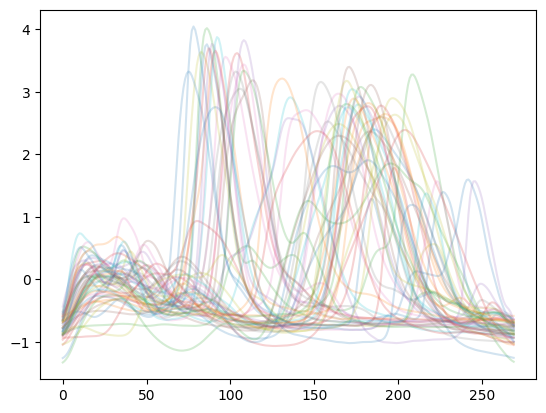

In [23]:
fiftyWord_4 = fiftyWord[4.0]
for s in fiftyWord_4:
    plt.plot(s, alpha=.2)
plt.show()

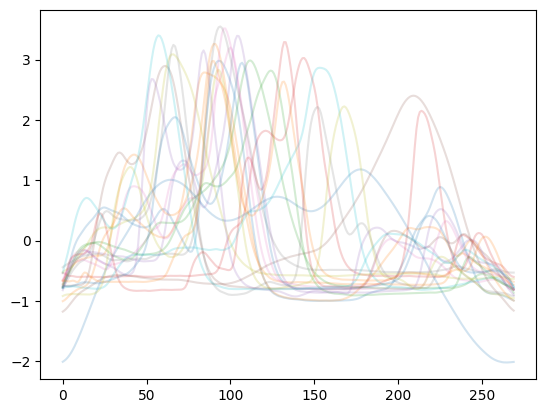

In [25]:
fiftyWord_12 = fiftyWord[12.0]
for s in fiftyWord_12:
    plt.plot(s, alpha=.2)
plt.show()

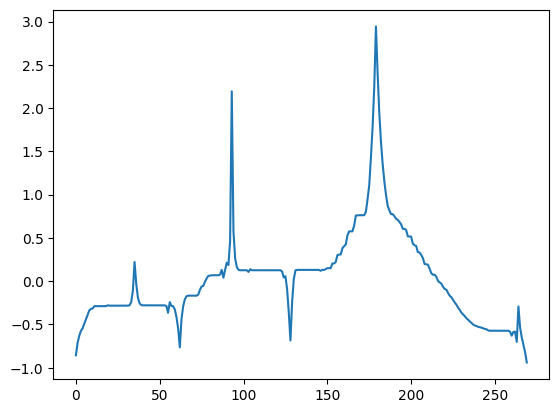

In [27]:
plt.plot(dtw_barycenter_averaging(fiftyWord_4))
plt.show()

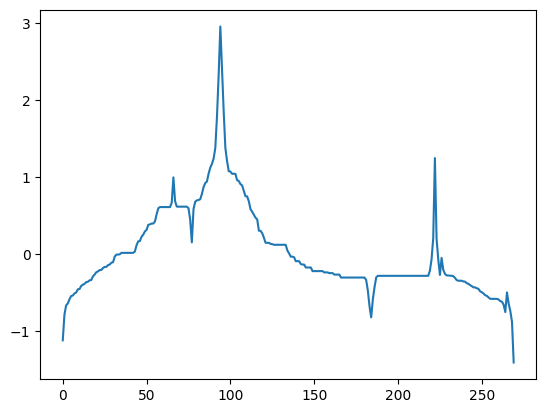

In [28]:
plt.plot(dtw_barycenter_averaging(fiftyWord_12))
plt.show()

In [32]:
trace = dataset['Trace']
print(fiftyWord.keys(), len(fiftyWord.keys()))

dict_keys([3.0, 1.0, 2.0, 4.0]) 4


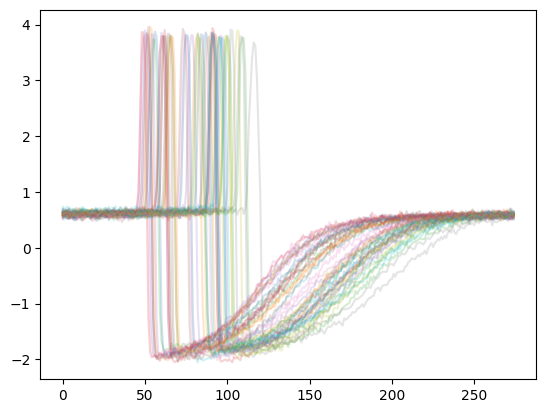

In [40]:
trace_2 = trace[1.0]
for s in trace_2:
    plt.plot(s, alpha=.2)
plt.show()

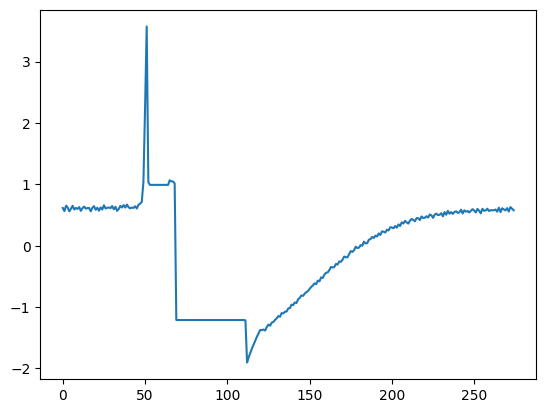

In [54]:
plt.plot(dtw_barycenter_averaging(trace_2, max_iter=100))
plt.show()

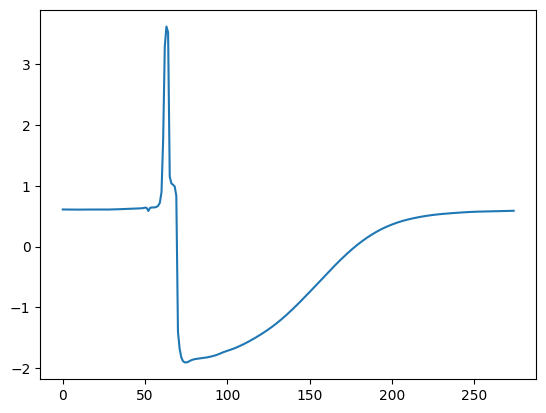

In [43]:
plt.plot(softdtw_barycenter(trace_2))
plt.show()

In [39]:
file_path = os.path.join(resource_dir, files[0])
file = open(file_path, "r")
data = file.readlines()
file.close()
# data = [d.strip() for d in data]
data = np.array([[float(d) for d in time_series.strip().split(' ') if d != ""] for time_series in data])
data

array([[ 4.        , -0.8909419 , -0.86099477, ..., -0.9194184 ,
        -0.93017828, -0.93938957],
       [12.        , -0.78346205, -0.68561749, ..., -0.96623282,
        -0.98049795, -0.99177639],
       [13.        , -1.3255684 , -1.284301  , ..., -1.1368405 ,
        -1.1979657 , -1.2699682 ],
       ...,
       [25.        , -1.1053955 , -1.0897564 , ..., -0.99401827,
        -1.0461744 , -1.0878249 ],
       [15.        , -1.5496778 , -1.4996599 , ..., -1.5721602 ,
        -1.5654099 , -1.55735   ],
       [16.        , -1.1383294 , -1.1175451 , ..., -0.99576816,
        -1.050867  , -1.1040808 ]])

In [32]:
dataset = dict()
dataset['test'] = {'1': [[1,2,3,4,5]]}
dataset['test']['1'].append([6,7,8,9,10])
dataset

{'test': {'1': [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]}}

In [52]:
from tslearn.metrics import dtw_discrepancy

ImportError: cannot import name 'dtw_discrepancy' from 'tslearn.metrics' (c:\Users\nine_\anaconda3\envs\tensorflow\lib\site-packages\tslearn\metrics\__init__.py)